# IBM DATA SCIENCE PYTHON PROJECT WITH STOCKS DATA

<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>

### Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


pip install yfinance
pip install bs4
pip install nbformat
pip install --upgrade plotly

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function

In [4]:
from datetime import datetime
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


In [5]:
tesla=yf.Ticker("TSLA")

In [6]:
tesla_data=tesla.history(period="max")

In [7]:
tesla_data.reset_index(inplace=True)


In [8]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [9]:
from bs4 import BeautifulSoup
import requests
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text




In [10]:
tesla_data=pd.read_html(html_data)
tesla_revenue=tesla_data[1]
tesla_revenue['Tesla Quarterly Revenue (Millions of US $)'] = tesla_revenue['Tesla Quarterly Revenue (Millions of US $)'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue=tesla_revenue.rename(columns={'Tesla Quarterly Revenue (Millions of US $)':'Date','Tesla Quarterly Revenue (Millions of US $).1':'Revenue'})


In [12]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data


In [13]:
GameStop=yf.Ticker('GME')
gme_data=GameStop.history(period="max")
gme_data.reset_index(inplace=True)


In [14]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


In [15]:
from bs4 import BeautifulSoup
import requests
url1='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data2=requests.get(url1).text
soup= BeautifulSoup(html_data,"html.parser")

In [16]:
game_data=pd.read_html(url1)
gme_revenue=game_data[1]
gme_revenue['GameStop Quarterly Revenue (Millions of US $)'] = gme_revenue['GameStop Quarterly Revenue (Millions of US $)'].str.replace(',|\$',"",regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue=gme_revenue.rename(columns={'GameStop Quarterly Revenue (Millions of US $)':'Date','GameStop Quarterly Revenue (Millions of US $).1':'Revenue'})


In [17]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


## Question 5: Plot Tesla Stock Graph

In [18]:
import matplotlib.pyplot as plt

In [19]:
type(tesla_data)

list

In [22]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data= pd.DataFrame(tesla_data, columns=['Date','Close'])


NameError: name 'plot' is not defined

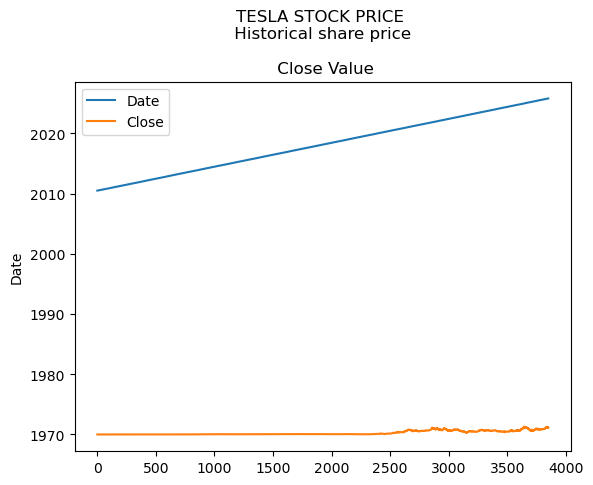

In [87]:
tesla_data.plot()
plt.title('TESLA STOCK PRICE \n Historical share price \n \n Close Value')
plt.ylabel('Date')
plot.xlabel('Historical Share Price')
plt.show()

In [51]:
x=pd.DataFrame(tesla_revenue)

In [53]:
x['Revenue']=x['Revenue'].str.replace('$','',regex=False)


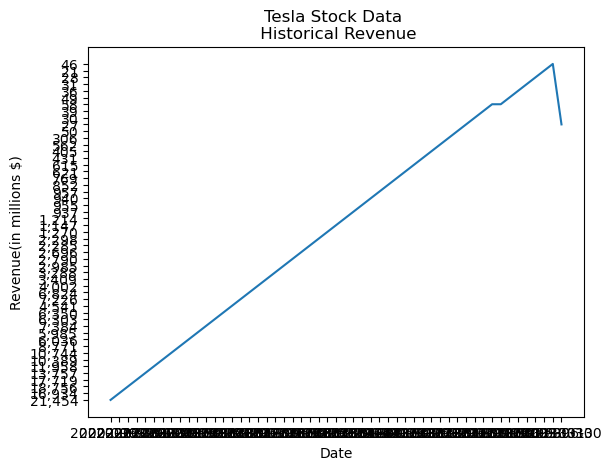

<Figure size 1e+07x1e+07 with 0 Axes>

In [116]:
import matplotlib.pyplot as plt
from datetime import datetime

dates = x['Date']
values =x['Revenue']

plt.plot(dates, values)
plt.xlabel("Date")
plt.ylabel("Revenue(in millions $)")
plt.title("Tesla Stock Data \n Historical Revenue")
plt.figure(figsize=(1000, 1000), dpi=10000)
plt.show()

## Plot GameStop Data Graph

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop')

In [88]:
gme = yf.Ticker('GME')
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)
gme_data= pd.DataFrame(gme_data, columns=['Date','Close'])


NameError: name 'plot' is not defined

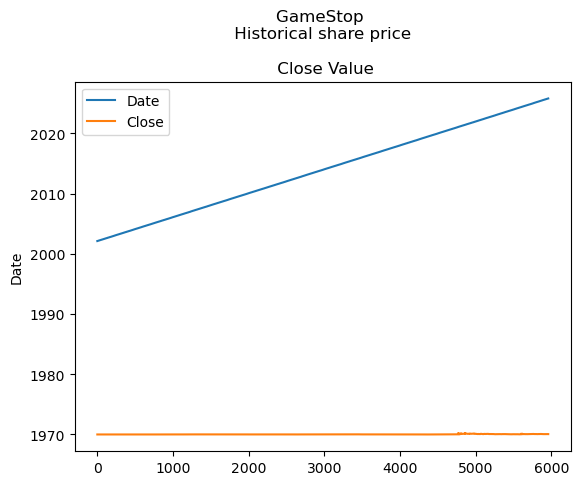

In [107]:
gme_data.plot()
plt.title('GameStop \n Historical share price \n \n Close Value')
plt.ylabel('Date')
plot.xlabel('Historical Share Price')
plt.show()

In [103]:
y=pd.DataFrame(gme_revenue)
y['Revenue']=y['Revenue'].str.replace('$','',regex=False)



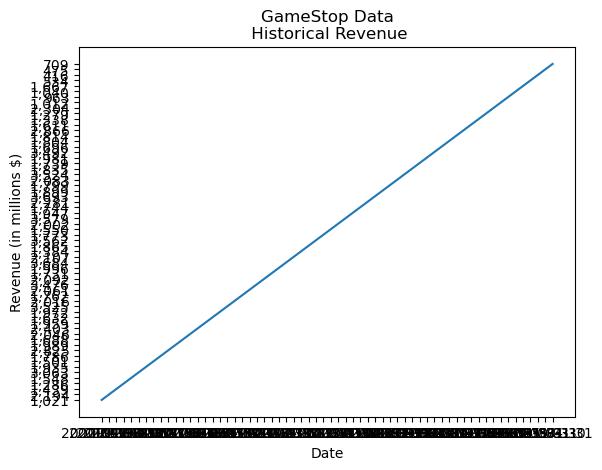

<Figure size 1e+07x1e+07 with 0 Axes>

In [114]:
date = y['Date']
value =y['Revenue']

plt.plot(date, value)
plt.xlabel("Date")
plt.ylabel("Revenue (in millions $)")
plt.title("GameStop Data\n Historical Revenue")
plt.figure(figsize=(1000, 1000), dpi=10000)
plt.show()
